In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Sessile Biomass

In [2]:
import pandas as pd
import os

base_dir = 'scan_results/'  # current directory
all_runs = []

for folder_name in os.listdir(base_dir):
    if folder_name == 'base_': 
        continue
    folder_path = os.path.join(base_dir, folder_name)
    if os.path.isdir(folder_path):
        m_file = os.path.join(folder_path, 'Mtot_fraction.dat')
        eps_file = os.path.join(folder_path, 'EPS_fraction.dat')
        auto_file = os.path.join(folder_path, 'autoinducer.dat')
        if os.path.exists(m_file) and os.path.exists(eps_file):
            m_df = pd.read_csv(m_file, sep=r'\s+', header=None, names=['time', 'M'])
            eps_df = pd.read_csv(eps_file, sep=r'\s+', header=None, names=['time', 'EPS'])
            a_df = pd.read_csv(auto_file, sep=r'\s+', header=None, names=['time', 'A'])
            
            df = m_df.merge(eps_df, on='time')
            df = df.merge(a_df, on='time')
            df = df.rename(columns={'M': f'M_{folder_name}', 'EPS': f'EPS_{folder_name}', 'A': f'A_{folder_name}'})
            all_runs.append(df.set_index('time'))

combined_df = pd.concat(all_runs, axis=1)
df = combined_df.reset_index()  # time becomes a column again

print(df.head())


    time  M_mu_0.000101010101  EPS_mu_0.000101010101  A_mu_0.000101010101  \
0      0             0.000750               0.000500             0.000000   
1   5000             0.000923               0.000516             0.158050   
2  10000             0.001126               0.000531             0.200174   
3  15000             0.001366               0.000548             0.243566   
4  20000             0.001645               0.000567             0.294124   

   M_eps_disp_5.05050505e-05  EPS_eps_disp_5.05050505e-05  \
0                   0.000750                     0.000500   
1                   0.000862                     0.000516   
2                   0.000989                     0.000532   
3                   0.001131                     0.000548   
4                   0.001291                     0.000566   

   A_eps_disp_5.05050505e-05  M_eps_disp_death_0.00012626262625  \
0                   0.000000                           0.000750   
1                   0.150391        

## EPS

## Merge

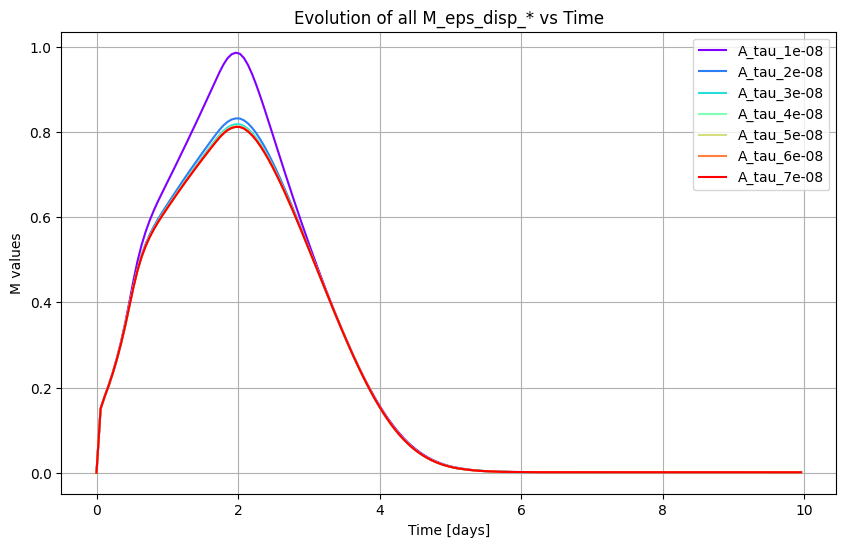

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import re

# Extract numeric part from the column name
def extract_number(col):
    match = re.search(r"[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?", col)
    if match:
        return float(match.group())
    return float("inf")  # fallback if no number is found

# Assuming df is already loaded
m_columns = [
    col for col in df.columns
    if re.match(r"^A_tau_[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?$", col)
]

m_columns.sort(key=extract_number)

# Rainbow colormap
cmap = plt.cm.rainbow
colors = cmap(np.linspace(0, 1, len(m_columns)))

plt.figure(figsize=(10,6))
for col, color in zip(m_columns, colors):
    plt.plot(df["time"]/86400, df[col], label=col, color=color)

plt.xlabel("Time [days]")
plt.ylabel("M values")
plt.title("Evolution of all M_eps_disp_* vs Time")
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'time_days'

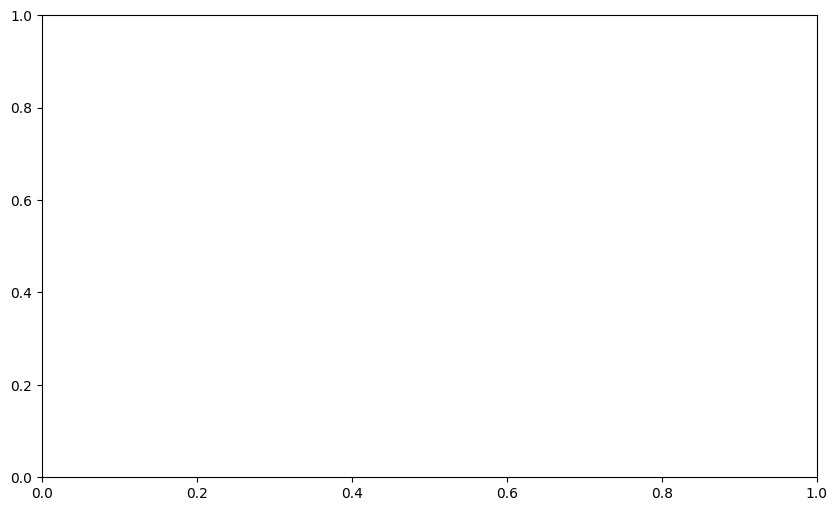

In [4]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10,6))

# Left axis: M and EPS
ax1.plot(df['time_days'], df['M_base']*3, label='M 10', color='blue', linewidth=2)
# ax1.plot(df['time_days'], df['M_enzyme_autoinducer_10'], label='M 10E', color='red', linewidth=2)


ax1.plot(df['time_days'], df['EPS_base']*7, label='EPS 10', color='blue', linewidth=2, linestyle='--')
# ax1.plot(df['time_days'], df['EPS_enzyme_autoinducer_10'], label='EPS 10E', color='red', linewidth=2, linestyle='--')

ax1.set_xlabel('Time (days)')
ax1.set_ylabel('M and EPS Concentration')
ax1.grid(True)

# # Right axis: Autoinducer A
# ax2 = ax1.twinx()
# ax2.plot(df['time_days'], df['A_base_autoinducer_10'], label='A 10', color='green', linewidth=2)
# ax2.plot(df['time_days'], df['A_enzyme_autoinducer_10'], label='A 10E', color='orange', linewidth=2)
# ax2.set_ylabel('Autoinducer (A)')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('M, EPS, and Autoinducer over Time under Different Conditions')
plt.tight_layout()
plt.show()


NameError: name 'ax2' is not defined

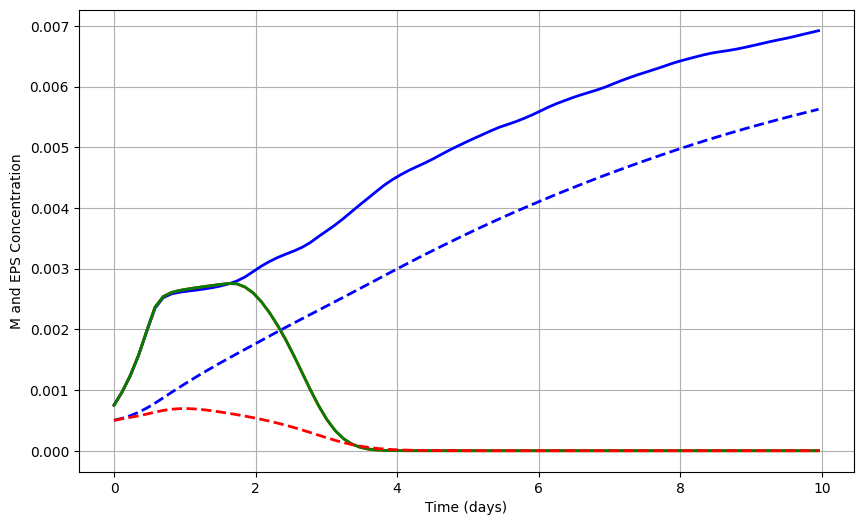

In [7]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10,6))

# Left axis: M and EPS
ax1.plot(df['time_days'], df['M_base_autoinducer_40'], label='M 40', color='blue', linewidth=2)
ax1.plot(df['time_days'], df['M_enzyme_autoinducer_40'], label='M 40E', color='red', linewidth=2)
ax1.plot(df['time_days'], df['M_enzyme_autoinducer_60'], label='M 60E', color='green', linewidth=2)


ax1.plot(df['time_days'], df['EPS_base_autoinducer_40'], label='EPS 40', color='blue', linewidth=2, linestyle='--')
ax1.plot(df['time_days'], df['EPS_enzyme_autoinducer_40'], label='EPS 40E', color='red', linewidth=2, linestyle='--')

ax1.set_xlabel('Time (days)')
ax1.set_ylabel('M and EPS Concentration')
ax1.grid(True)

# Right axis: Autoinducer A
# ax2 = ax1.twinx()
# ax2.plot(df['time_days'], df['A_base_autoinducer_40'], label='A 40', color='green', linewidth=2)
# ax2.plot(df['time_days'], df['A_enzyme_autoinducer_40'], label='A 40E', color='orange', linewidth=2)
# ax2.set_ylabel('Autoinducer (A)')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('M, EPS, and Autoinducer over Time under Different Conditions')
plt.tight_layout()
plt.show()


In [26]:

biomass_df = pd.read_csv('biomass_0.dat', 
                 sep=r'\s+',   
                 header=None, 
                 names=['time', 'B']) 

print(biomass_df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'biomass_0.dat'

In [ ]:
plt.plot(biomass_df["time"] / (60*60*24), biomass_df["B"])
plt.xlabel("Days")
plt.ylabel("B")
plt.show()
